In [ ]:
#!pip install fbprophet

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from fbprophet.utilities import regressor_coefficients
from google.colab import files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
data = pd.read_csv("BTC-USD-Modified.csv") 
data.head(10)

,Date,Close,weighted_sentiment,Close_Diff,Sentiment_Diff
0,2021-07-26,37337.535156,-0.144935,0.000000,0.000000
1,2021-07-27,39406.941406,0.075139,2069.406250,0.220075
2,2021-07-28,39995.906250,0.346511,588.964844,0.271372
3,2021-07-29,40008.421875,0.472747,12.515625,0.126236
4,2021-07-30,42235.546875,0.348919,2227.125000,-0.123828
5,2021-07-31,41626.195313,0.091941,-609.351562,-0.256979
6,2021-08-01,39974.894531,0.196600,-1651.300782,0.104659


In [ ]:
data.dtypes
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes
data.head(10)

,Date,Close,weighted_sentiment,Close_Diff,Sentiment_Diff
0,2021-07-26,37337.535156,-0.144935,0.000000,0.000000
1,2021-07-27,39406.941406,0.075139,2069.406250,0.220075
2,2021-07-28,39995.906250,0.346511,588.964844,0.271372
3,2021-07-29,40008.421875,0.472747,12.515625,0.126236
4,2021-07-30,42235.546875,0.348919,2227.125000,-0.123828
5,2021-07-31,41626.195313,0.091941,-609.351562,-0.256979
6,2021-08-01,39974.894531,0.196600,-1651.300782,0.104659


In [ ]:
data.columns = ['ds', 'y', 'ws', 'cd', 'sd']#renaming the columns of the dataset
data.head(10)

,ds,y,ws,cd,sd
0,2021-07-26,37337.535156,-0.144935,0.000000,0.000000
1,2021-07-27,39406.941406,0.075139,2069.406250,0.220075
2,2021-07-28,39995.906250,0.346511,588.964844,0.271372
3,2021-07-29,40008.421875,0.472747,12.515625,0.126236
4,2021-07-30,42235.546875,0.348919,2227.125000,-0.123828
5,2021-07-31,41626.195313,0.091941,-609.351562,-0.256979
6,2021-08-01,39974.894531,0.196600,-1651.300782,0.104659


In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.add_regressor('ws')
#m.add_regressor('cd')
m.add_regressor('sd')
m.fit(data) # fit the model using all data
data.dtypes

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


ds    datetime64[ns]
y            float64
ws           float64
cd           float64
sd           float64
dtype: object

          ds             y        ws           cd        sd
0 2021-07-26  37337.535156 -0.144935     0.000000  0.000000
1 2021-07-27  39406.941406  0.075139  2069.406250  0.220075
2 2021-07-28  39995.906250  0.346511   588.964844  0.271372
3 2021-07-29  40008.421875  0.472747    12.515625  0.126236
4 2021-07-30  42235.546875  0.348919  2227.125000 -0.123828
5 2021-07-31  41626.195313  0.091941  -609.351562 -0.256979
6 2021-08-01  39974.894531  0.196600 -1651.300782  0.104659
Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'extra_regressors_additive',
       'extra_regressors_additive_lower', 'extra_regressors_additive_upper',
       'sd', 'sd_lower', 'sd_upper', 'ws', 'ws_lower', 'ws_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


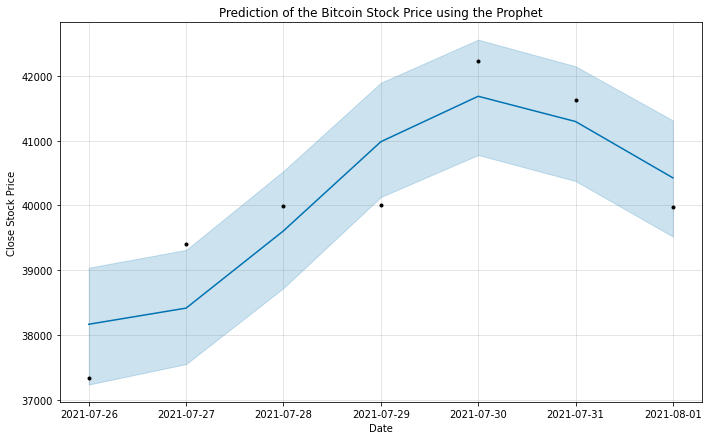

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
future = m.make_future_dataframe(periods=1) #we need to specify the number of days in future
future = future.merge(data, on='ds')
print(future)
prediction = m.predict(future)
print(prediction.columns)
m.plot(prediction)
plt.title("Prediction of the Bitcoin Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.savefig("BTC-Sentiment.png", bbox_inches='tight')
plt.show()
files.download("BTC-Sentiment.png") 

In [ ]:
trend = prediction.trend.values
x = 0
for i in range(len(trend)-1):
  x += trend[i+1] - trend[i]
x = x/(len(trend)-1)
#print(x)

In [ ]:
#set this value to the predicted day's closing price (day 8)
day8_closing = 39730.23	
y_true = data.y.values
y_true = np.append(y_true, day8_closing)
print("Real prices: ", y_true)
y_pred = prediction.yhat.values
y_pred = np.append(y_pred, y_true[6]+x)
print("Predicted prices: ", y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred)#, squared=False)
print("MSE =", mse)
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
print("MAE =", mae)
r2 = r2_score(y_true=y_true, y_pred=y_pred)
print("r^2 =", r2)

Real prices:  [37337.535156 39406.941406 39995.90625  40008.421875 42235.546875
 41626.195313 39974.894531 39730.23    ]
Predicted prices:  [38165.47838215 38414.99360868 39608.02624942 40984.47834733
 41686.45721723 41296.41852577 40426.72808701 40170.91428194]
MSE = 447649.491337654
MAE = 619.401472415314
r^2 = 0.7635184098941507


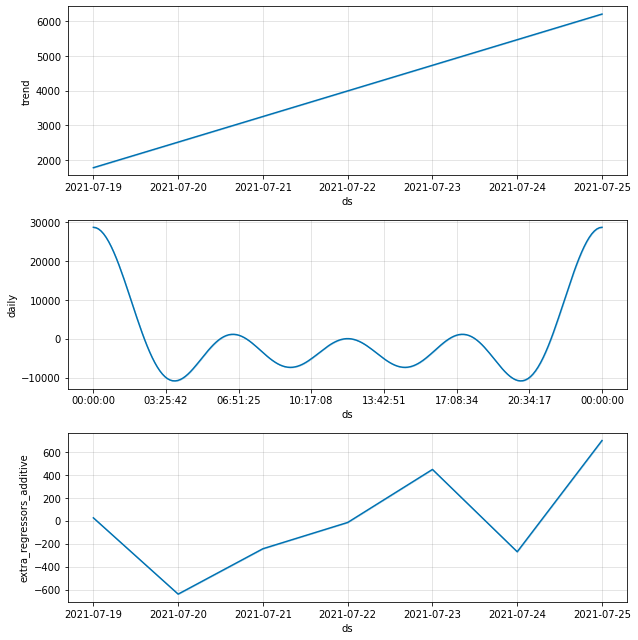

In [ ]:
m.plot_components(prediction)
plt.show()

In [ ]:
#https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer
#https://futurice.com/blog/business-forecasting-with-facebook-prophet